# Introduction to Machine Learning

We will review concepts covered in this unit and briefly go over concepts from the previous units. Every unit after this will build on all the foundational knowledge so far. Each unit will cover a different class of algorithms or analysis, and many of them are unrelated to each other in terms of mathematical underpinnings. If there is anything that will make the rest of the curriculum easier, it will be thoroughly understanding everything up to this unit.

------------------------

## Theory

**Question** -  Explain whether each scenario is a classification or regression problem,
and indicate whether we are most interested in inference or prediction.
Finally, provide n and p.

(a) We collect a set of data on the top 500 firms in the US. For each
firm we record profit, number of employees, industry and the
CEO salary. We are interested in understanding which factors
affect CEO salary.

(b) We are considering launching a new product and wish to know
whether it will be a success or a failure. We collect data on 20
similar products that were previously launched. For each product
we have recorded whether it was a success or failure, price
charged for the product, marketing budget, competition price,
and ten other variables.

(c) We are interesting in predicting the % change in the US dollar in
relation to the weekly changes in the world stock markets. Hence
we collect weekly data for all of 2012. For each week we record
the % change in the dollar, the % change in the US market,
the % change in the British market, and the % change in the
German market.

### Answers
a--> regression and inference
b--> classification and prediction
c--> regression and prediction

**Question** - You will now think of some real-life applications for statistical learning.

(a) Describe three real-life applications in which classification might
be useful. Describe the response, as well as the predictors. Is the
goal of each application inference or prediction? Explain your
answer.

(b) Describe three real-life applications in which regression might
be useful. Describe the response, as well as the predictors. Is the
goal of each application inference or prediction? Explain your
answer.

(c) Describe three real-life applications in which cluster analysis
might be useful.

## Answers
1. classifying species of birds etc
2. predicting stock prices
3. grouping acedamic performances


## Practical

### College Data Set

This exercise relates to the College data set, which can be found in
the file College.csv. It contains a number of variables for 777 different
universities and colleges in the US. [More Info](http://www.stat.yale.edu/~pollard/Courses/100.fall98/pollard/USnews/usnews.documentation)

## Importing required Libraries

In [2]:
%matplotlib inline
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import math
import pandas as pd

**Task** - Read in the CSV, set the College name to the index and print out a summary.

In [3]:
college_data=pd.read_csv('college.csv',index_col=0)
college_data.head()
#college_data.describe()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Task** - Plot a scatterplot matrix of the first 10 variables. Plot side-by-side boxplots of `Outstate` vs. `Private`.

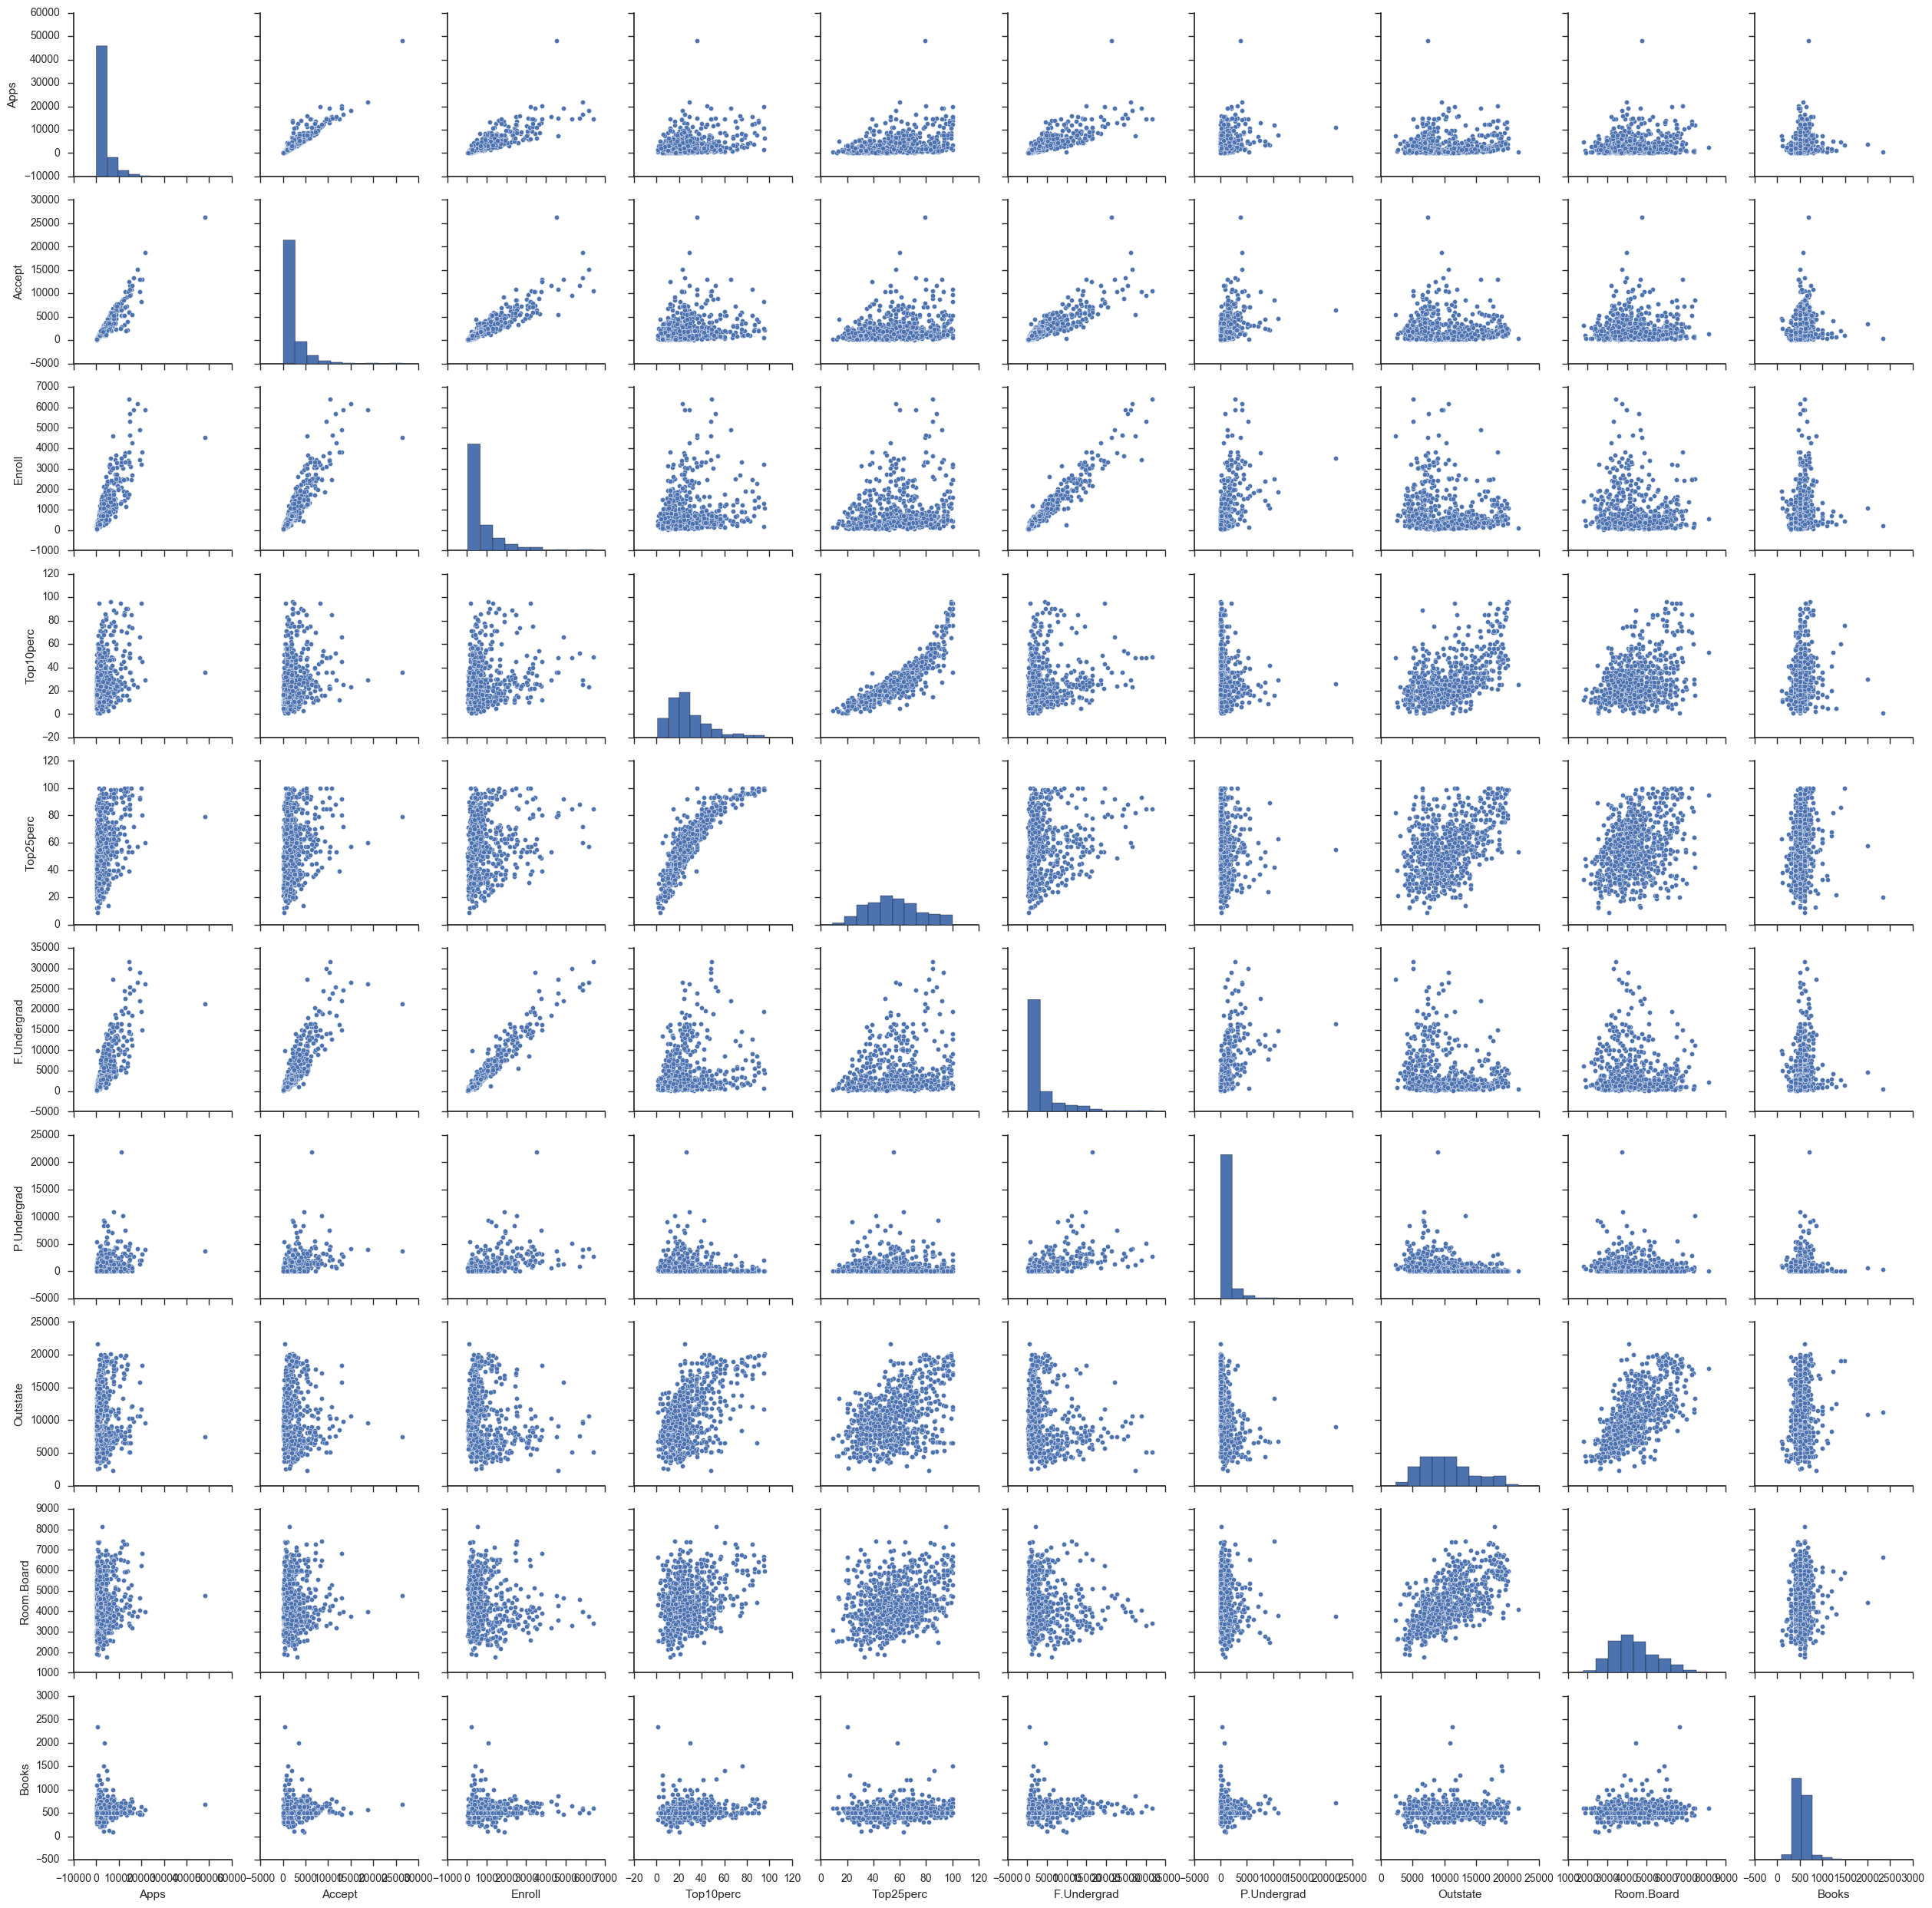

In [4]:
college_data_tennumvar=college_data.iloc[:,:11]
college_data_tennumvar.head()
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(college_data_tennumvar)

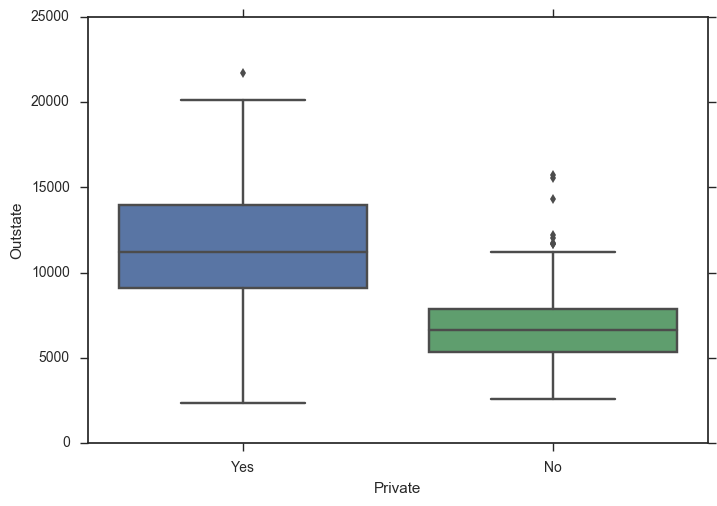

In [5]:
g=sns.boxplot(x='Private',y='Outstate',data=college_data)

**Task** -  Create a new qualitative variable, called Elite, by binning
the Top10perc variable. We are going to divide universities
into two groups based on whether or not the proportion
of students coming from the top 10% of their high school
classes exceeds 50%

In [6]:
def if_elite(top10):
    if top10>50:
        return True
    else:
        return False

In [7]:
college_data['elite']=college_data['Top10perc'].apply(if_elite)
college_data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,elite
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,False
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,False
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,False
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,True
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,False


**Task ** - See how many elite universities there are. Compare the summary statistics of elite vs. non-elite.

In [8]:
college_data['elite'].value_counts()

False    699
True      78
Name: elite, dtype: int64

**Task** - Produce side-by-side boxplots of Outstate versus Elite.

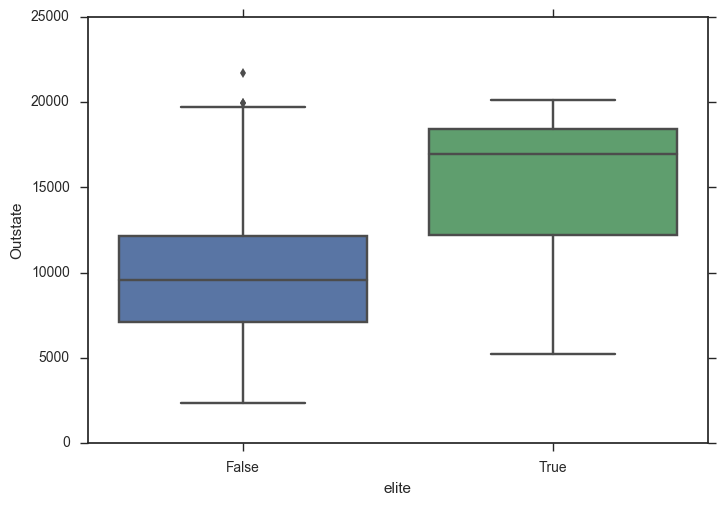

In [9]:
g=sns.boxplot(x='elite',y='Outstate',data=college_data)

**Task** - Produce some histograms with differing numbers of bins for a few of the quantitative variables. Play around with dividing the print window into varying numbers of regions and plots.

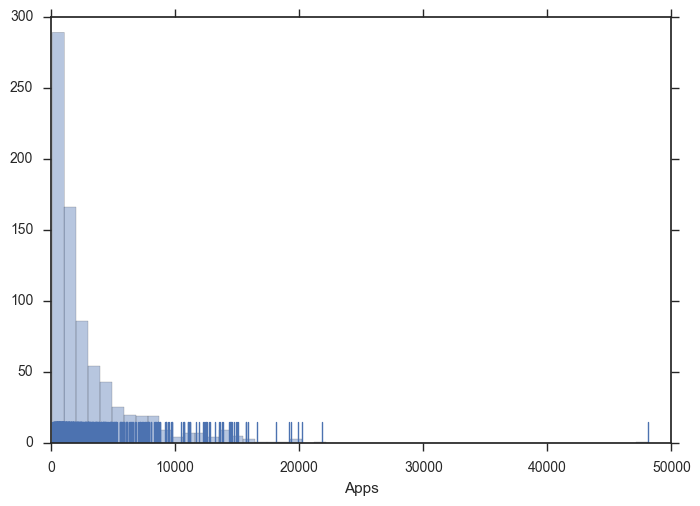

In [10]:
# plot histogram for number of applications
sns.distplot(college_data['Apps'], kde=False, rug=True);

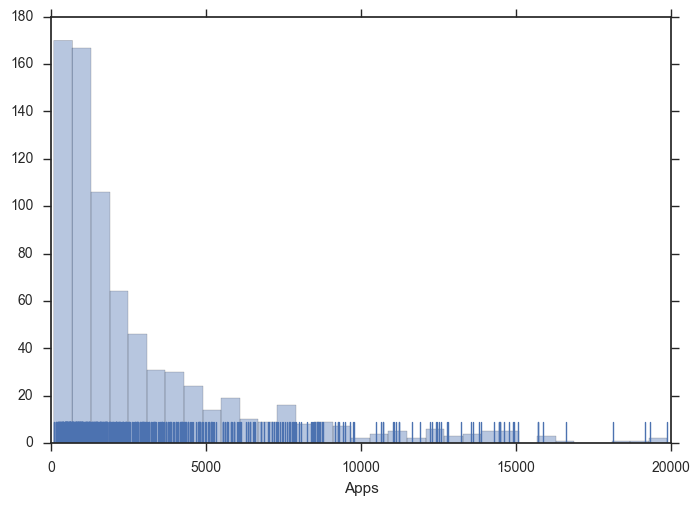

In [11]:
# plot histogram for number of applications for apps < 20000
sns.distplot(college_data[college_data['Apps']<20000]['Apps'], kde=False, rug=True);

**Tasks**
- Continue exploring the data on your own. Write down your observations and some potential questions that have arisen about the data set.

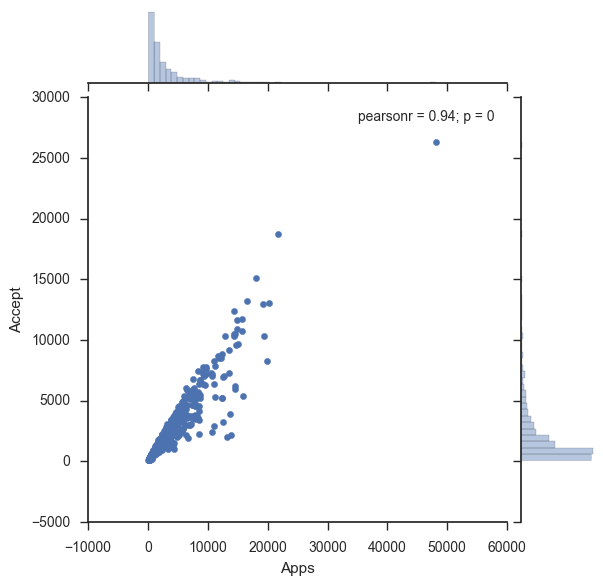

In [12]:
# joint plot between applications and acceptance
sns.jointplot(x="Apps", y="Accept", data=college_data);

Above joint pots shows an upper and lower bounds on acceptance rates

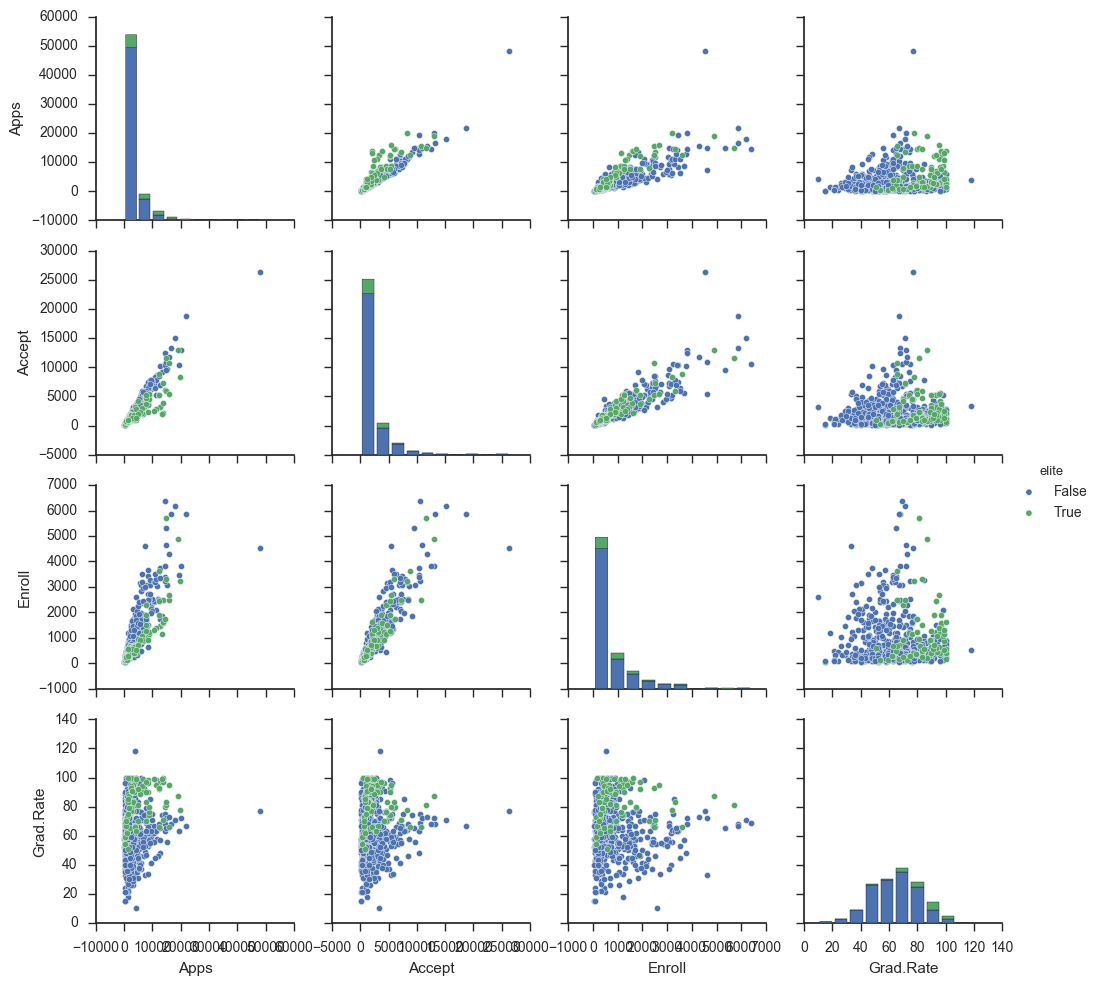

In [13]:
g = sns.pairplot(college_data,hue='elite',vars=['Apps','Accept','Enroll','Grad.Rate'])

### Auto Data Set

This exercise involves the Auto data set studied in the lab. Make sure
that the missing values have been removed from the data. [More Info](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)

**Task** - Which of the predictors are quantitative, and which are qualitative?

In [14]:
auto_data=pd.read_csv('auto.csv')
auto_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

**Task** - What is the range of each quantitative predictor? What is the mean and standard deviation of each quantitative
predictor?




In [15]:
auto_desc=auto_data.describe()
auto_descT=auto_desc.transpose()
auto_descT['range']=auto_descT['max']-auto_descT['min']
auto_descT

,count,mean,std,min,25%,50%,75%,max,range
mpg,397.0,23.515869,7.825804,9.0,17.5,23.0,29.0,46.6,37.6
cylinders,397.0,5.458438,1.701577,3.0,4.0,4.0,8.0,8.0,5.0
displacement,397.0,193.532746,104.379583,68.0,104.0,146.0,262.0,455.0,387.0
weight,397.0,2970.261965,847.904119,1613.0,2223.0,2800.0,3609.0,5140.0,3527.0
acceleration,397.0,15.555668,2.749995,8.0,13.8,15.5,17.1,24.8,16.8
year,397.0,75.994962,3.690005,70.0,73.0,76.0,79.0,82.0,12.0
origin,397.0,1.574307,0.802549,1.0,1.0,1.0,2.0,3.0,2.0


**Task** - - Now remove the 10th through 85th observations. What is the
range, mean, and standard deviation of each predictor in the
subset of the data that remains?

In [16]:
a=list(range(0,9))
b=list(range(84,len(auto_data)))
c=a+b

In [17]:
auto_data_trimmed=auto_data.iloc[list(range(0,9))+list(range(84,len(auto_data))),:]
auto_desc=auto_data_trimmed.describe()
auto_descT=auto_desc.transpose()
auto_descT['range']=auto_descT['max']-auto_descT['min']
auto_descT

,count,mean,std,min,25%,50%,75%,max,range
mpg,322.0,24.446584,7.897147,11.0,18.00,23.95,30.650,46.6,35.6
cylinders,322.0,5.366460,1.652674,3.0,4.00,4.00,6.000,8.0,5.0
displacement,322.0,186.770186,99.606562,68.0,98.50,144.50,250.000,455.0,387.0
weight,322.0,2931.372671,810.712477,1649.0,2211.25,2792.50,3494.250,4997.0,3348.0
acceleration,322.0,15.725466,2.676686,8.5,14.00,15.55,17.275,24.8,16.3
year,322.0,77.136646,3.119623,70.0,75.00,77.00,80.000,82.0,12.0
origin,322.0,1.602484,0.818627,1.0,1.00,1.00,2.000,3.0,2.0


**Task** - Using the full data set, investigate the predictors graphically,
using scatterplots or other tools of your choice. Create some plots
highlighting the relationships among the predictors. Comment
on your findings.



In [18]:
# convert horsepower from object to float
auto_data2=auto_data.convert_objects(convert_numeric=True)
auto_data2.dtypes

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [19]:
auto_data2['year'].value_counts()

73    40
78    36
76    34
82    30
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: year, dtype: int64

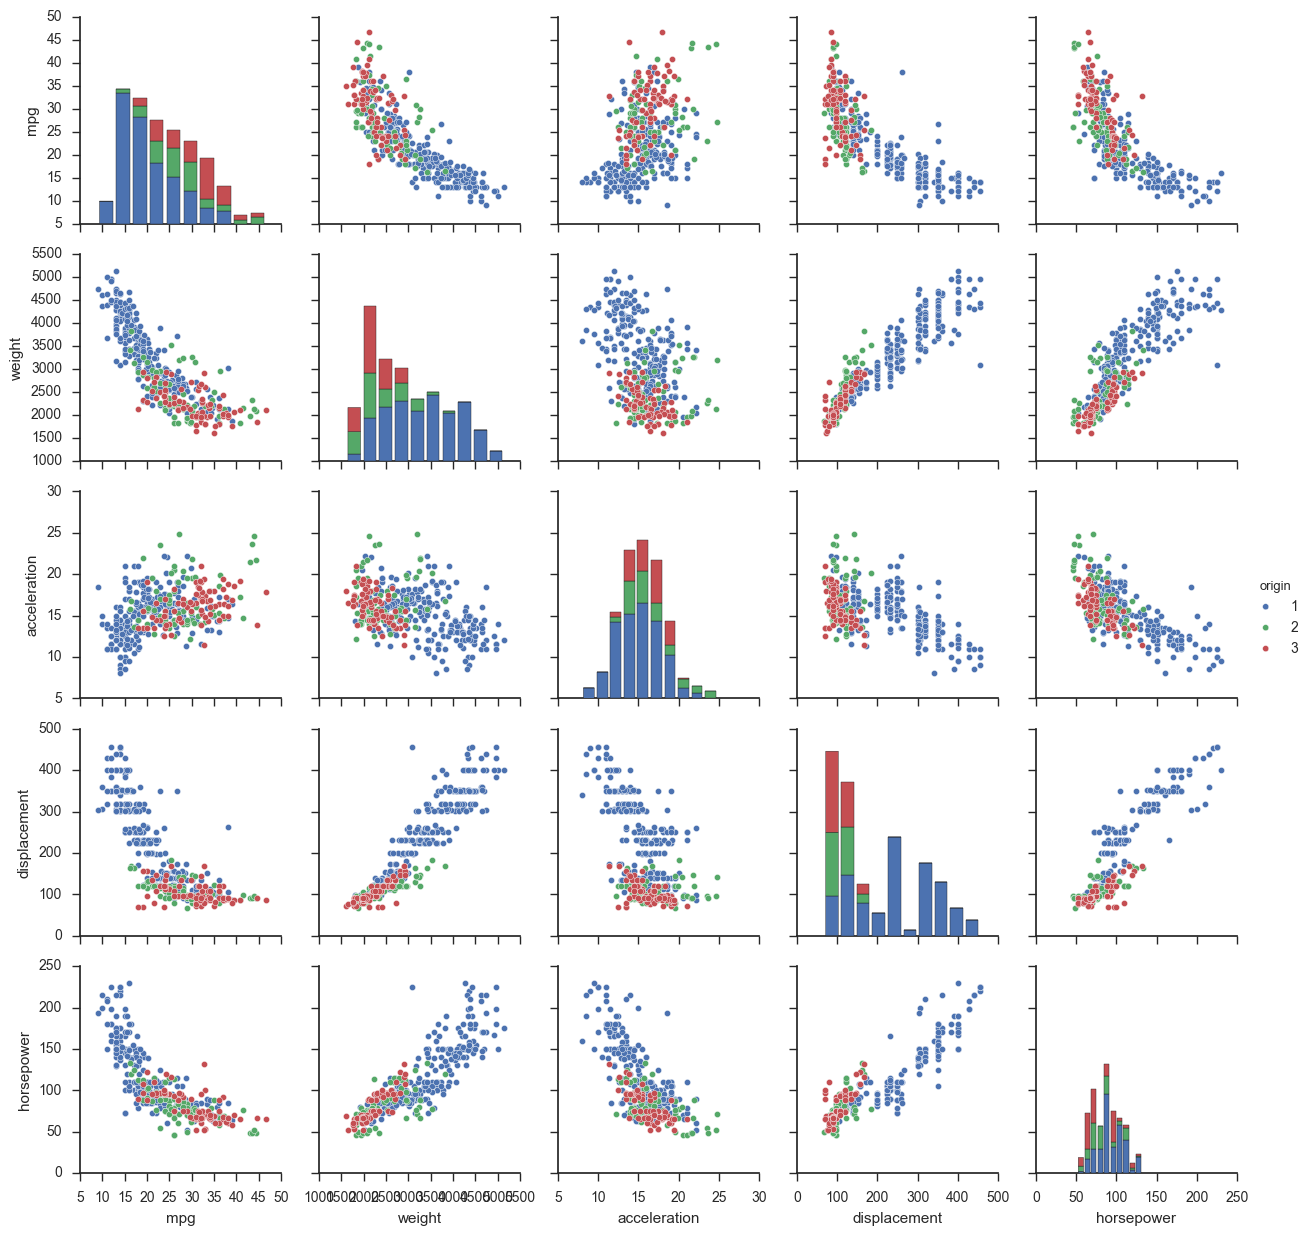

In [20]:
g=sns.pairplot(auto_data2[(auto_data2['year']>=70)&(auto_data2['year']<85)],vars=['mpg','weight','acceleration','displacement','horsepower'],hue='origin')

Pairplot was graphed among significant nunerical variables of interest such as 'mpg', 'weight', 'diplacement', 'horsepower'. Origin was used as variable for grouping the data. Salient findings are
1. Manufactures from origins 2 and 3 procude cars with lower weight, lower horsepower, higher mpg and lower displacement.
2. mpg has exponential correlation to weight, displacement and horsepower

**Task** - Suppose that we wish to predict gas mileage (mpg) on the basis
of the other variables. Do your plots suggest that any of the
other variables might be useful in predicting mpg? Justify your
answer.

yes they do,
weight, displacement and horsepower are variable that correlate well with mpg. If the data is segreggated by year of manufacturing (for example, 1970-1975; 1975-1980, 1980-1985) 

## Boston Housing Data Set

This exercise involves the Boston housing data set.  [More Info](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

**Task** - To begin, load in the Boston data set. Examine the data set briefly.

In [21]:
boston_data=pd.read_csv('boston.csv')
boston_data.head()
boston_data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

**Task** - How many rows are in this data set? How many columns? What
do the rows and columns represent?

In [22]:
boston_data.shape

(506, 14)

In [67]:
boston_data_stats=boston_data.describe()
boston_data_stats=boston_data_stats.transpose()
boston_data_stats['range']=boston_data_stats['max']-boston_data_stats['min']
boston_data_stats
#sns.distplot(boston_data['crim'])
boston_data_hcrim=boston_data[boston_data['crim']>30]
boston_data_hcrim

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
404,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
414,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
427,37.6619,0.0,18.1,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,10.9


**Task** - Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your findings.

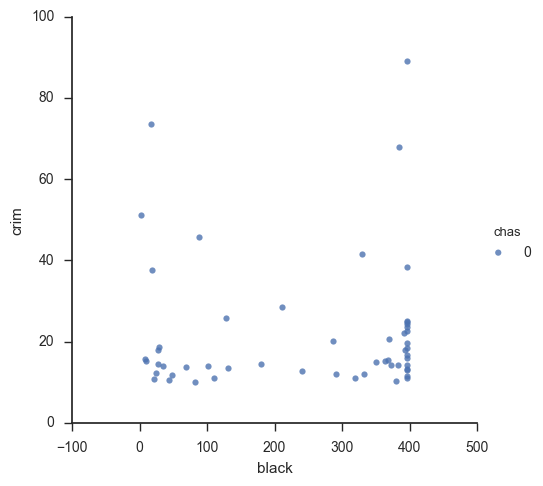

In [58]:
sns.lmplot('black','crim',boston_data_hcrim,hue='chas',fit_reg=False)

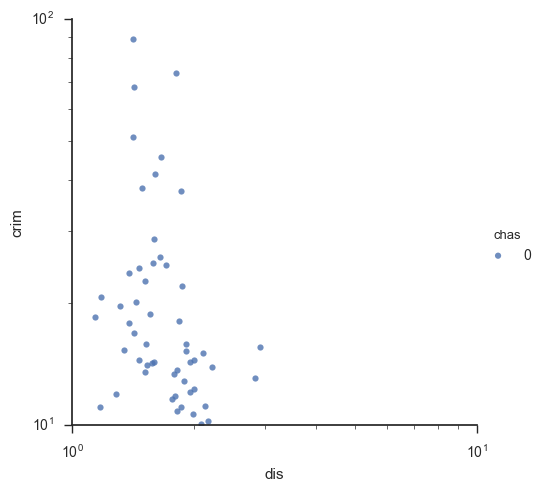

In [59]:
# weighted distance to Boston Employment centers vs Crime rate (shows some correlation)
g=sns.lmplot('dis','crim',boston_data_hcrim,hue='chas',fit_reg=False)
g.set(xscale="log", yscale="log")

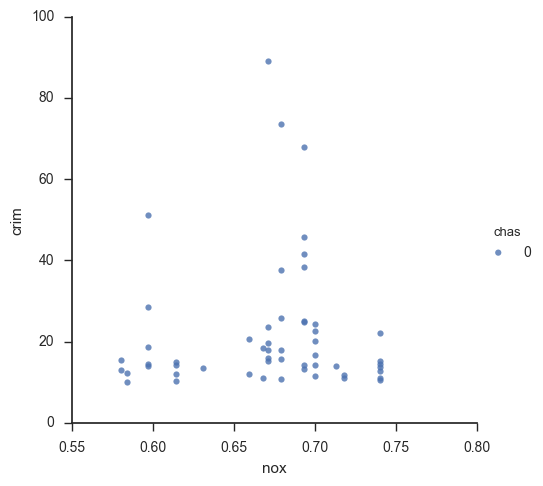

In [60]:
# NOX vs Crime rate (shows some correlation)
g=sns.lmplot('nox','crim',boston_data_hcrim,hue='chas',fit_reg=False)
#g.set(xscale="log", yscale="log")

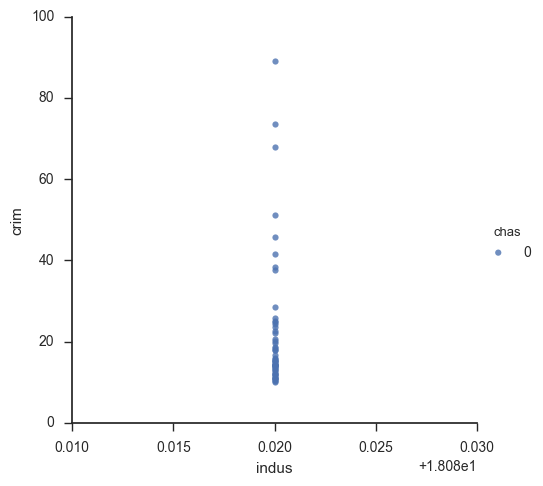

In [61]:
# INDUS vs Crime rate (shows some correlation)
g=sns.lmplot('indus','crim',boston_data_hcrim,hue='chas',fit_reg=False)
#g.set(xscale="log", yscale="log")

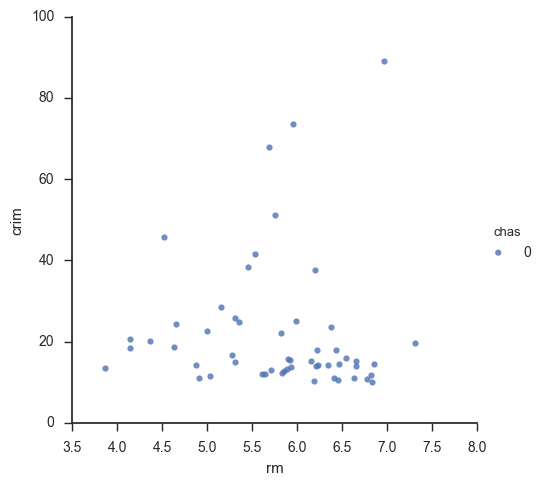

In [62]:
# average number of rooms per dwelling vs Crime rate (shows some correlation)
g=sns.lmplot('rm','crim',boston_data_hcrim,hue='chas',fit_reg=False)
#g.set(xscale="log", yscale="log")

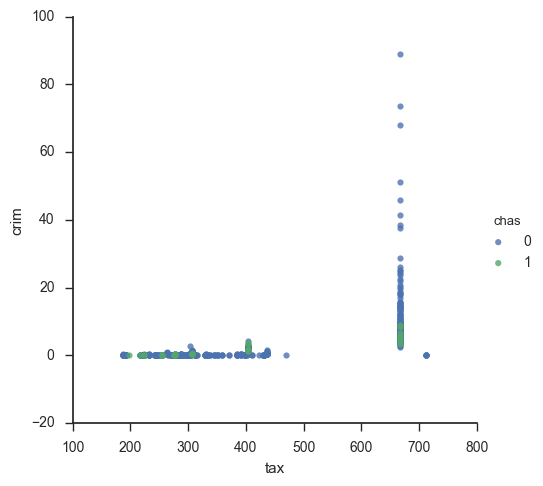

In [46]:
# full value property tax vs Crime rate (shows some correlation)
g=sns.lmplot('tax','crim',boston_data,hue='chas',fit_reg=False)
#g.set(xscale="log", yscale="log")

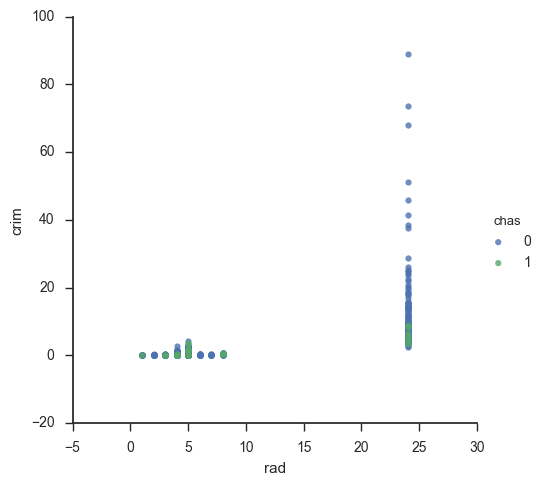

In [47]:
# index of accessibility to radial highways vs Crime rate (shows some correlation)
g=sns.lmplot('rad','crim',boston_data,hue='chas',fit_reg=False)
#g.set(xscale="log", yscale="log")

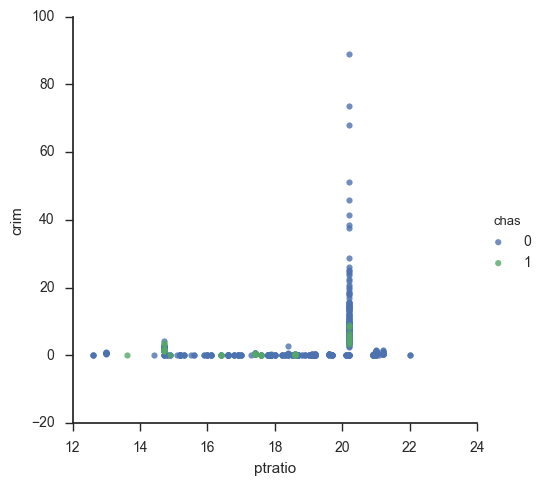

In [48]:
# pupil to teacher ratio vs Crime rate (shows some correlation)
g=sns.lmplot('ptratio','crim',boston_data,hue='chas',fit_reg=False)
#g.set(xscale="log", yscale="log")

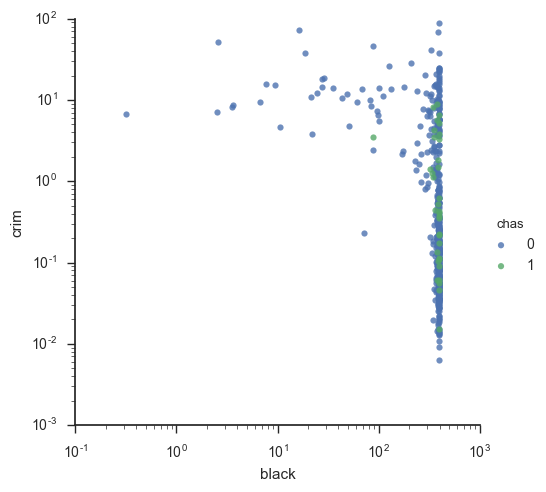

In [49]:
# blacks vs Crime rate (shows some correlation)
g=sns.lmplot('black','crim',boston_data,hue='chas',fit_reg=False)
g.set(xscale="log", yscale="log")

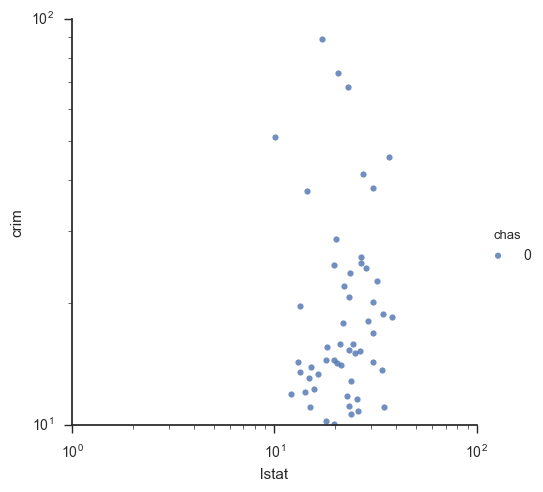

In [63]:
# percentage lower status population vs Crime rate (shows some correlation)
g=sns.lmplot('lstat','crim',boston_data_hcrim,hue='chas',fit_reg=False)
g.set(xscale="log", yscale="log")

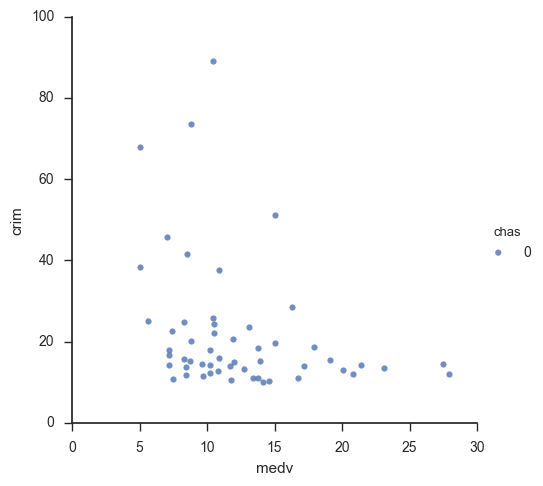

In [64]:
# median home value vs Crime rate (shows some correlation)
g=sns.lmplot('medv','crim',boston_data_hcrim,hue='chas',fit_reg=False)
#g.axis.xlim=(0,25)
#g.set(xscale="log", yscale="log")

**Task** - Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.

### weighted distance to boston employement centers has correlation to crime rate in an exponential fashion

**Task** - Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119c51860>]], dtype=object)

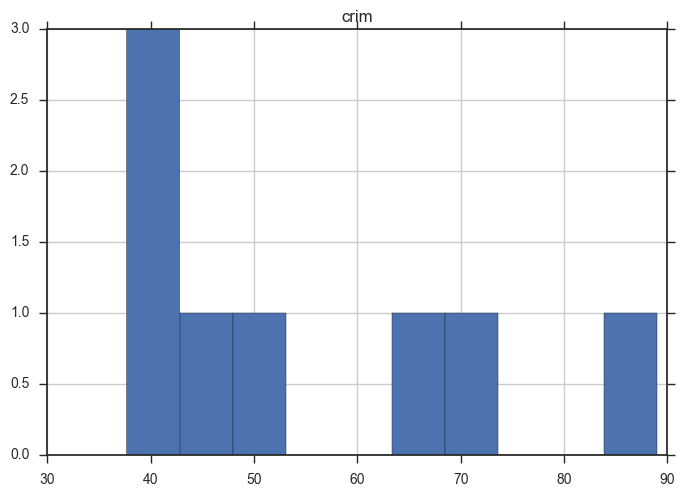

In [68]:
boston_data_hcrim.hist(column='crim')

### 8 suburbs have more than 40% crime rate

**Task** - How many of the suburbs in this data set bound the Charles river?

In [74]:
print('number of suburbs thar bound charles river =',len(boston_data[boston_data['chas']==1]))

number of suburbs thar bound charles river = 35


**Task** - What is the median pupil-teacher ratio among the towns in this
data set?

In [75]:
boston_data['ptratio'].median()

19.05

**Task** - Which suburb of Boston has lowest median value of owneroccupied
homes? What are the values of the other predictors
for that suburb, and how do those values compare to the overall
ranges for those predictors? Comment on your findings.

In [89]:
min_medv=boston_data['medv'].min()
boston_data[boston_data['medv']==min_medv]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


### Suburbs 405 and 398 have lowest median value of owner occupied homes. crim, nox, age, tax, ptratio, lstat, indus are on higher side. These suburbs are closer to boston employement centers. These suburbs have very old houses and large black population. Most of tax could be coming from businesses.

In [90]:
boston_data_stats

,count,mean,std,min,25%,50%,75%,max,range
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762,88.96988
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000,100.00000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400,27.28000
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000,1.00000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710,0.48600
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800,5.21900
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000,97.10000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265,10.99690
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000,23.00000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000,524.00000


**Task** - In this data set, how many of the suburbs average more than
seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms
per dwelling.

In [94]:
len(boston_data[boston_data['rm']>7])

64

In [95]:
len(boston_data[boston_data['rm']>8])

13

In [96]:
boston_data[boston_data['rm']>8]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
224,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
226,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,387.38,3.13,37.6
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47,41.7
233,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,378.95,3.95,48.3
253,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,396.90,3.54,42.8
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0


### Majority of suburbs with more 8 rooms per dwelling on average have less than 1% crime rate, high black population and higher pupil to teacher ratio